<a href="https://colab.research.google.com/github/MasterDiaz410/Tarea4/blob/master/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Carga de data
El dataset Fashion-MNIST cotiene 60,00 imagenes para el set de datos de entrenamiento y un set de datos de prueba de 10,000.

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Imagenes
Las imagenes son Numpy Arrays de 28x28, los pixeles estan entre los valores de 0 a 255

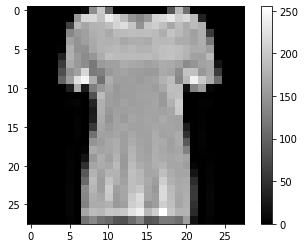

In [7]:
plt.imshow(train_images[10], cmap = 'gray')
plt.colorbar()

## Labels

In [9]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

| Label | Class       |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

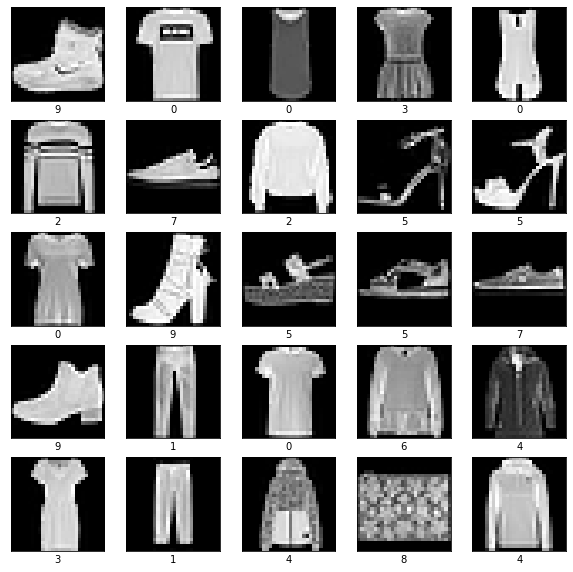

In [10]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

# Tarea

Para esta tarea se deben utilizar únicamente 3 clases, se puede escoger cualquiera de las 10 disponibles en el data set, por lo que hay que filtrar las clases elegidas en los arreglos:
- train_images
- train_labels
- test_images
- test_labels

El objetivo de la tarea es comparar la diferencia al aplicar feature scale/normalization y las features sin ninguna transformación y comparar el efecto de el scaling/normalización sobre el entrenamiento con regresión logística.
- Se debe crear un diccionario con el valor numérico de las labels y el texto correspondiente para poder relacionar el valor numérico con el valor descriptivo/textual.
- Aplicar regresión logística con entropía cruzada como función de costo, crear una función que recibe de entrada un tensor x y predice la clase(utilizar el diccionario para mostrar el texto perteneciente al label).
- Adicional a el costo(por entropía cruzada) en el grafo se debe agregar un nodo que calcule el acurracy(comparando el valor real vs el estimado por el modelo).
- El accuracy y el costo deben ser agregados a tensorboard (agregar screenshots al notebook)
- Se debe agregar al notebook un screenshot del grafo/grafos de tensorboard, simplificando(usando names y name_scope como visto en clase).
- Todo lo anterior se debe hacer tanto para datos crudos, como para datos transformados con (normalización y escalado)
- Basado en los ejemplos de visualización de imagenes en el notebook ,crear una función que reciba de entrada el tensor que representa a una imagen, grafique esta imagen poniendo como título el nombre de la prenda con mayor probabilidad.
- Utilizar la función anterior para mostrar una muestra aleatoria de 5 imágenes(y la predicción probabilistica de la prenda)
- Comparar con tensorboard las curvas de aprendizaje del entrenamiento con datos crudos vs datos transformados, y los 2 grafos y concluir/opinar al respecto usando markdown(agregando screenshots)
- Utilizar mini batch gradient descent con batch size de 32

# Filtro train_labels y train_images

In [33]:
filtro_train = (train_labels == 7) | (train_labels == 8) | (train_labels == 9)

# Train Labels

In [32]:
train_labels_filtered = train_labels[filtro_train]

# Train Images

In [34]:
train_images_filtered = train_images[filtro_train]

Tipo

In [35]:
print(type(train_images_filtered))

<class 'numpy.ndarray'>


Forma

In [36]:
print(train_images_filtered.shape)

(18000, 28, 28)


Rango

In [37]:
print(train_images_filtered.ndim)

3


Visualización de datos

In [38]:
print(train_images_filtered)

[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   3   0   0]
  [  0   0   0 ...   9   0   0]
  ...
  [  0   9 188 ...   7   0   0]
  [  0   0   0 ...   4   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0  

# Train Images sin preprocesamiento

In [44]:
width = 18000
height = 28*28
train_images_reshaped = train_images_filtered.reshape(width, height)

Tipo

In [45]:
print(type(train_images_reshaped))

<class 'numpy.ndarray'>


Forma

In [46]:
print(train_images_reshaped.shape)

(18000, 784)


Rango

In [47]:
print(train_images_reshaped.ndim)

2


Visualización de datos

In [48]:
print(train_images_reshaped)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Filtro test_images y test_labels

In [49]:
filtro_test = (test_labels == 7) | (test_labels == 8) | (test_labels == 9)

# Test Labels

In [50]:
test_labels_filtered = test_labels[filtro_test]

# Test Images

In [51]:
test_images_filtered = test_images[filtro_test]

Tipo

In [53]:
print(type(test_images_filtered))

<class 'numpy.ndarray'>


Forma

In [54]:
print(test_images_filtered.shape)

(3000, 28, 28)


Rango

In [55]:
print(test_images_filtered.ndim)

3


Visualización de datos

In [56]:
print(test_images_filtered)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


# Test Images sin procesar

In [58]:
width = 3000
height = 28*28
test_images_reshaped = test_images_filtered.reshape(width, height)

Tipo

In [59]:
print(type(test_images_reshaped))

<class 'numpy.ndarray'>


Forma

In [60]:
print(test_images_reshaped.shape)

(3000, 784)


Rango

In [61]:
print(test_images_reshaped.ndim)

2


Visualización de datos

In [62]:
print(test_images_reshaped)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Normalización train_images

In [65]:
norm = 255
train_images_normalized = (train_images_reshaped / norm)
print(train_images_normalized)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [66]:
print(train_images_normalized[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627451 

# Normalización test_images

In [68]:
test_images_normalized = (test_images_reshaped / norm)
print(test_images_normalized)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [69]:
print(test_images_normalized[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

# Codificación One Hot de train_labels

In [79]:
grafoonehot = tf.Graph()
with grafoonehot.as_default():
    # Razas constantes
    etiquetas_grafo = tf.constant(train_labels_filtered)
    uniques_graph, index_1 = tf.unique(etiquetas_grafo)
    hot_graph = tf.one_hot(index_1, depth = 3)
    max_graph = tf.reduce_max(index_1)

with tf.Session(graph = grafoonehot ) as sesiononehot:
    yunicos_s, idx_s_1, hot_s, maximo_s_1 = sesiononehot.run([uniques_graph, index_1, hot_graph, max_graph])
    print("Uniques\n", yunicos_s)
    print("Index\n", idx_s_1)
    print("One Hot code\n", hot_s)

Uniques
 [9 7 8]
Index
 [0 1 0 ... 1 1 2]
One Hot code
 [[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Codificación One Hot de test_labels

In [80]:
grafoonehot_te_l = tf.Graph()
with grafoonehot_te_l.as_default():
    # Razas constantes
    etiquetas_g_te_l = tf.constant(test_labels_filtered)
    yunicos_g_te_l, idx_g_te_l = tf.unique(etiquetas_g_te_l)
    hot_g_te_l = tf.one_hot(idx_g_te_l, depth = 3)
    maximo_g_te_l = tf.reduce_max(idx_g_te_l)

with tf.Session(graph = grafoonehot_te_l ) as sesiononehot_te_l:
    yunicos_s_te_l, idx_s_te_l, hot_s_te_l, maximo_s_te_l = sesiononehot_te_l.run([yunicos_g_te_l, idx_g_te_l, hot_g_te_l, maximo_g_te_l])
    print("Unique\n", yunicos_s_te_l)
    print("Index\n", idx_s_te_l)
    print("One Hot code\n", hot_s_te_l)

Unique
 [9 7 8]
Index
 [0 1 1 ... 0 0 2]
One Hot code
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


# Diccionario

In [81]:
dictionary = {0:"Ankle boot", 1:"Sneaker", 2:"Bag"}


{0: 'Ankle boot', 1: 'Sneaker', 2: 'Bag'}


Hiperparámetros

In [82]:
param_epochs = 10
param_batch_size = 32
param_lr = 0.01
batches = int(train_images_normalized.shape[0] / param_batch_size)

# Softmax Graph normalized data

In [102]:
ft_max_graph = tf.Graph()
with ft_max_graph.as_default():
    with tf.name_scope('Placeholder_Declaration'):    
        x_value = 784
        x_axis = tf.placeholder(tf.float32, [None, x_value], name='X')
    
        y_value = 3
        y_axis = tf.placeholder(tf.float32, [None, y_value], name='y_axis')
    
        learning_rate = tf.placeholder(dtype = tf.float64, name='LR')
    
    with tf.name_scope('Variables_Declaration'):
        w_axis = tf.Variable(tf.zeros([x_value, y_value]), name = 'W')
    
        vector_b = tf.Variable(tf.zeros([y_value]), name = 'B')
    
    with tf.name_scope('Hypothesis'):   
        # Logits
        logits_graph = tf.add(tf.matmul(x_axis, w_axis, name='Hypothesis_Dot_Product'), vector_b, name='Hypothesis_Plus_B')
        yhat_graph = tf.nn.softmax(logits_graph, name='Softmax_Hypothesis')
    
    with tf.name_scope('Cost_Function'):
        cost_graph = (tf.reduce_mean(-tf.reduce_sum(y_axis * tf.log(yhat_graph), axis = 1)))
    
    with tf.name_scope('Gradient_Des.Optimizer'):
        cost_summary_graph = tf.summary.scalar(name = 'Cost', tensor = cost_graph)
        optimization = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_graph)
    
    prediction = tf.equal(tf.argmax(yhat_graph,1), tf.argmax(y_axis,1))
    accuracy_var = tf.reduce_mean(tf.cast(prediction, tf.float32)) 
    
    accuracy_summary_graph = tf.summary.scalar('Accuracy',accuracy_var)
    
    summaries_graph = tf.summary.merge_all()


with tf.Session(graph = ft_max_graph) as session:
    # Variables Initializer
    tf.global_variables_initializer().run()
    
    # Log
    writer = tf.summary.FileWriter('gdrive/My Drive/Colab Notebooks/graphs/graph', session.graph)
    
    for epoch_count in range(param_epochs):
        for i in range(batches):
            offset_var = i * epoch_count 
            x = train_images_normalized[offset_var: offset_var + param_batch_size] 
            y = hot_s_te_l[offset_var: offset_var + param_batch_size] 
            _, final_W, final_B,ac = session.run([optimization, w_axis,vector_b,accuracy_var], feed_dict={x_axis:x, y_axis:y, learning_rate:0.001})
            cost_var = session.run(cost_graph, feed_dict={x_axis:x, y_axis:y})
                        
            summaries_s_var = session.run(summaries_graph, feed_dict={x_axis:x, y_axis:y, learning_rate:0.001})
            writer.add_summary(summaries_s_var, i)
                                   
        if (epoch_count % 1 == 0):
            print('Iteracion:', epoch_count, 'Costo:', cost_var)
        
    writer.close()
        
    print('Accuracy\n', ac)

Iteracion: 0 Costo: 0.8055301
Iteracion: 1 Costo: 1.1015984
Iteracion: 2 Costo: 1.1028444
Iteracion: 3 Costo: 1.0867188
Iteracion: 4 Costo: 1.0432937
Iteracion: 5 Costo: 1.1343567


InvalidArgumentError: ignored

# Predictive Function

In [107]:
def predict(X_value, W_value, B_value):
    logits_values = np.matmul(X_value,W_value) + B_value 
    softmax_value = np.exp(logits_values)/np.sum(np.exp(logits_values), axis = 1, keepdims = True)
    
    size1 = 5
    size2 = 10
    plt.figure(figsize=(size1, size2))
    reshape_size = 28
    plt.imshow(X_value.reshape(reshape_size, reshape_size), cmap='gray')
    plt.xlabel(dictionary[np.argmax(softmax_value)])
    plt.title('Probability')
    plt.title(np.max(softmax_value,axis=1))
    plt.show()
    
    return softmax_value

# Normalized data prediction

Image 1

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


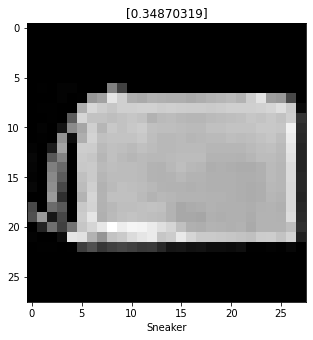

array([[0.31004841, 0.34870319, 0.34124841]])

In [123]:
random_init = 0
random_finish = 2999
reshape_init = 1
reshape_finish = 784
prediccion_image_1 = predict(test_images_normalized[np.random.randint(random_init, random_finish)].reshape(reshape_init, reshape_finish),final_W,final_B)
prediccion_image_1

Image 2

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


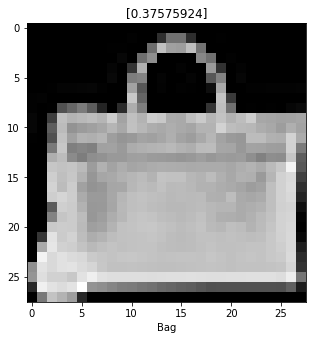

array([[0.27211473, 0.35212602, 0.37575924]])

In [121]:
prediccion_image_2 = predict(test_images_normalized[np.random.randint(random_init, random_finish)].reshape(reshape_init, reshape_finish), final_W,final_B)
prediccion_image_2

Image 3

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


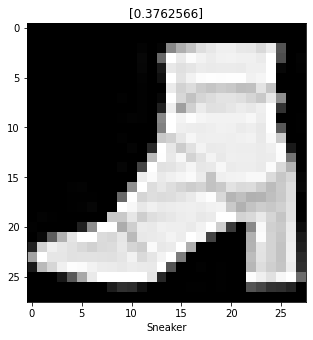

array([[0.25503212, 0.3762566 , 0.36871127]])

In [122]:
prediccion_image_3 = predict(test_images_normalized[np.random.randint(random_init, random_finish)].reshape(reshape_init, reshape_finish), final_W,final_B)
prediccion_image_3

Image 4

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


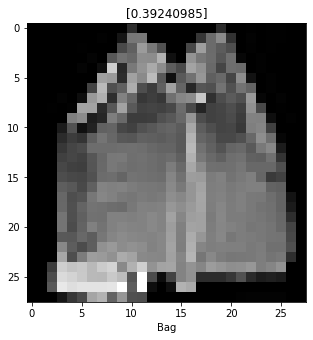

array([[0.31375516, 0.293835  , 0.39240985]])

In [146]:
prediccion_image_4 = predict(test_images_normalized[np.random.randint(random_init, random_finish)].reshape(reshape_init, reshape_finish), final_W,final_B)
prediccion_image_4

Image 5

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


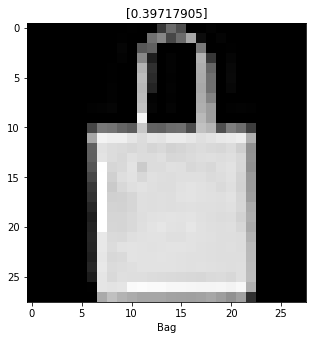

array([[0.33346648, 0.26935447, 0.39717905]])

In [137]:
prediccion_5 = predict(test_images_normalized[np.random.randint(random_init, random_finish)].reshape(reshape_init,784),final_W,final_B)
prediccion_5

# Hiperparámetros

In [138]:
epochs_soft = 10
batch_size_soft = 32
batches_soft = int(train_images_reshaped.shape[0] / batch_size_soft)

In [139]:
grafos_max_soft = tf.Graph()
with grafos_max_soft.as_default():
    
    x_dim = 784
    y_dim = 3
    with tf.name_scope('Placeholder_Declaration'):    
        x_value = tf.placeholder(tf.float32, [None, x_dim], name='X')
        y_value = tf.placeholder(tf.float32, [None, y_dim], name='Y')
    
        ph_learning = tf.placeholder(dtype = tf.float64, name='lr')
    
    with tf.name_scope('Variables_Declaration'):
        w_value = tf.Variable(tf.zeros([784,3]),name='W')
        b_value = tf.Variable(tf.zeros([3]), name='B')
    
    with tf.name_scope('Hypothesis'):   
        logits_graph = tf.add(tf.matmul(x_value, w_value, name='Hypothesis_Dot_Product'), b_value, name='Hypothesis_Plus_B')
        yhat_soft = tf.nn.softmax(logits_graph, name='Hyphotesis_Softmax')
    
    with tf.name_scope('Cost_Function'):
        cost_g_soft = (tf.reduce_mean(-tf.reduce_sum(y_value * tf.log(yhat_soft), axis = 1)))
    
    with tf.name_scope('Des_Gradient_Optimizer'):
        cost_summary_soft = tf.summary.scalar('Cost',cost_g_soft)
        
        optimization = tf.train.GradientDescentOptimizer(ph_learning).minimize(cost_g_soft)
    
    correct_prediction_soft = tf.equal(tf.argmax(yhat_soft,1), tf.argmax(y_value,1))
    Soft_Accuracy = tf.reduce_mean(tf.cast(correct_prediction_soft, tf.float32))
    accuracy_summary_soft = tf.summary.scalar('Soft_Accuracy',Soft_Accuracy)
    
    summaries_soft_var = tf.summary.merge_all()

In [141]:
with tf.Session(graph = grafos_max_soft) as sessionC:
    tf.global_variables_initializer().run()
    
    writer = tf.summary.FileWriter('gdrive/My Drive/Colab Notebooks//graphs2', sessionC.graph)
    
    for epoch_count_soft in range(epochs_soft):
        for i in range(batches_soft):
            offset = i * epoch_count_soft 
            x = train_images_reshaped[offset: offset + batch_size_soft] ## slicing de filas en los datos crudos 
            y = hot_s_te_l[offset: offset + batch_size_soft] ## slicing de filas de las labels del one hot
            __,final_WW,final_BB,acc = sessionC.run([optimization,w_value,b_value,Soft_Accuracy], feed_dict={x_value:x, y_value:y, ph_learning:0.00001})
            cost_ss = sessionC.run(cost_g_soft, feed_dict={x_value:x, y_value:y})
            
            ## sesion que ejecuta el nodo del escalar para tensorboard
            summaries_ss = sessionC.run(summaries_soft_var, feed_dict={x_value:x, y_value:y, ph_learning:0.001})
            writer.add_summary(summaries_ss, i)
        
        if (epoch_count_soft % 1 == 0):
            print('Iteration: ', epoch_count_soft, '. Cost: ', cost_ss)
        
        writer.close()
      
    print('Accuracy', acc)

Iteration:  0 . Cost:  nan


/usr/local/lib/python3.6/dist-packages/tensorflow/python/summary/writer/writer.py:388: UserWarning: Attempting to use a closed FileWriter. The operation will be a noop unless the FileWriter is explicitly reopened.
  warnings.warn("Attempting to use a closed FileWriter. "


Iteration:  1 . Cost:  nan
Iteration:  2 . Cost:  nan
Iteration:  3 . Cost:  nan
Iteration:  4 . Cost:  nan
Iteration:  5 . Cost:  nan


InvalidArgumentError: ignored